In [1]:
from itertools import permutations
from typing import *
import ThermoPyle as TP
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, mpld3

%matplotlib notebook
mpld3.enable_notebook()

In [3]:
Water = TP.ThermoFluid(fluid="Water", xvar="T", yvar="P", zvar="U", numPoints=[217, 217])

In [4]:
d_vars = ["U", "T", "P", "S", "D", "G"]
newCols = {"d({2})/d({1})|{0}".format(x,y,z) for x, y, z in permutations(d_vars, 3)
           }.union(d_vars).difference(set(Water.vars))

newCols = newCols.union({"PHASE"})

#print(",\n".join(newCols))

In [5]:
new_cols = lambda n: list(set(list(newCols)[:n] + d_vars + ["PHASE"]).difference(Water.vars))
def makeCols(n: int) -> List[Tuple[Text, bool]]:
    L = new_cols(n)
    returns = []
    for i, col in enumerate(L):
        print("Iteration {0} of {1}:".format(i+1, len(L) ))
        print(" " * 4 + "Calculating Column {0}".format(col))
        print("=" * (20 + max([4 + len("Calculating Column {0}".format(col)), 
                               len("Iteration {0} of {1}:".format(i+1, len(L)))])))
        try:
            Water.add_column(col)
            print(" " * 4 + "Success!")
            returns.append((col, True))
        except KeyboardInterrupt:
            raise KeyboardInterrupt("Program Interrupted by User. Stopping")
            break
        except:
            print(" " * 4 + "Failed!")
            returns.append((col, False))
            pass
    return returns

In [6]:
mycols = makeCols(5)

Iteration 1 of 9:
    Calculating Column d(D)/d(S)|U
    Success!
Iteration 2 of 9:
    Calculating Column d(U)/d(S)|G
    Success!
Iteration 3 of 9:
    Calculating Column d(U)/d(T)|D
    Success!
Iteration 4 of 9:
    Calculating Column PHASE
    Success!
Iteration 5 of 9:
    Calculating Column D
    Success!
Iteration 6 of 9:
    Calculating Column d(P)/d(S)|T
    Success!
Iteration 7 of 9:
    Calculating Column S
    Success!
Iteration 8 of 9:
    Calculating Column G
    Success!
Iteration 9 of 9:
    Calculating Column d(P)/d(U)|G
    Success!


<IPython.core.display.Javascript object>


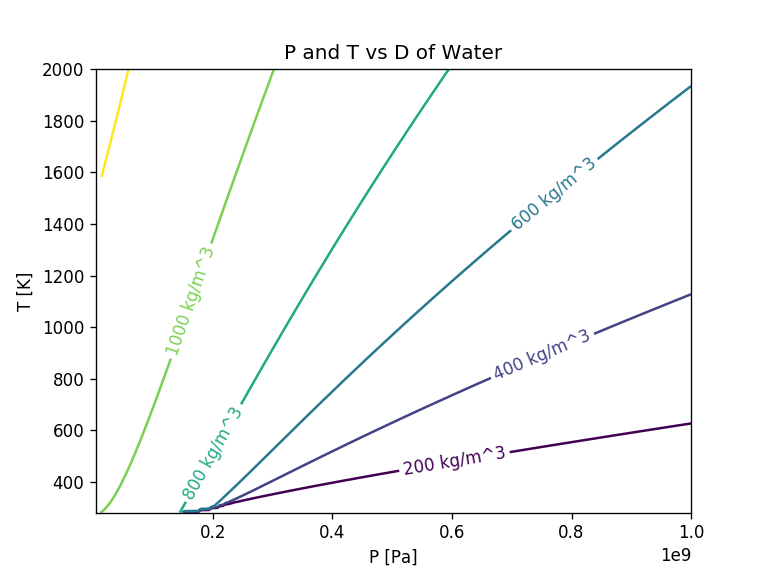

In [7]:
Water.clean()
Water.refresh()
Water.xvar = "P"
Water.yvar = "T"
Water.zvar="U"
Water.refresh()
Water.clean()
TP.fluid_contour_plot(Water, 'D')

<IPython.core.display.Javascript object>


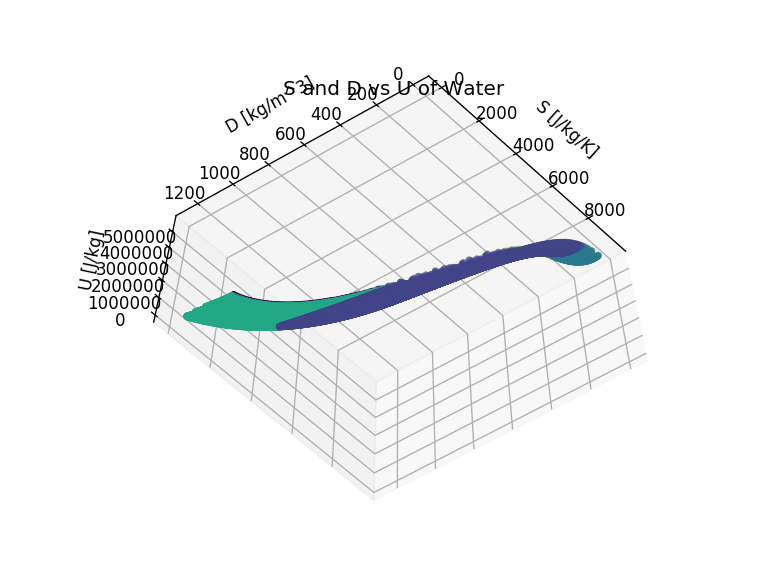

In [8]:
Water.xvar = "P"
Water.yvar = "T"
Water.zvar="U"
Water.refresh()
Water.clean()
TP.fluid_plot(Water, xvar="S", yvar="D", zvar="U", coloring="PHASE")